In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [135]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Summary of Dataset ##

In [32]:
descriptions = {
    'car_ID': "Unique identifier for each car",
    'symboling': "Insurance risk rating for the car",
    'CarName': "Name or model of the car",
    'fueltype': "Type of fuel used (gas or diesel)",
    'aspiration': "Method of air intake for the engine (std or turbo)",
    'doornumber': "Number of doors on the car",
    'carbody': "Type of car body or design (sedan, hatchback, etc.)",
    'drivewheel': "Type of drivetrain or wheels (FWD, RWD, 4WD)",
    'enginelocation': "Engine location (front or rear)",
    'wheelbase': "Distance between front and rear axles",
    'carlength': "Length of the car",
    'carwidth': "Width of the car",
    'carheight': "Height of the car",
    'curbweight': "Weight of the car without passengers or cargo",
    'enginetype': "Type of engine (ohc, ohcv, etc.)",
    'cylindernumber': "Number of cylinders in the engine",
    'enginesize': "Size of the engine (in cc or ci)",
    'fuelsystem': "Type of fuel injection system (mpfi, etc.)",
    'boreratio': "Ratio of cylinder bore diameter to stroke length",
    'stroke': "Length of the engine stroke",
    'compressionratio': "Engine compression ratio",
    'horsepower': "Engine power output (in hp)",
    'peakrpm': "Engine's peak RPM for generating power",
    'citympg': "Fuel efficiency in city driving (mpg)",
    'highwaympg': "Fuel efficiency on the highway (mpg)",
    'price': "Price of the car"
}

column_info_list = []
for col in df.columns:
    name = col
    description = descriptions.get(col, "No description available")
    null_value = df[col].isnull().sum()
    nunique = df[col].nunique()
    sample = df[col].unique()[:5]
    data_type = df[col].dtype

    column_info_list.append({'Name': name, 'Description': description, 'Null Value': null_value, 'Nunique': nunique, 'Sample': sample, 'Data Type': data_type})  # Corrected the colon placement

column_info = pd.DataFrame(column_info_list)

In [33]:
column_info

,Name,Description,Null Value,Nunique,Sample,Data Type
0,car_ID,Unique identifier for each car,0,205,"[1, 2, 3, 4, 5]",int64
1,symboling,Insurance risk rating for the car,0,6,"[3, 1, 2, 0, -1]",int64
2,CarName,Name or model of the car,0,147,"[alfa-romero giulia, alfa-romero stelvio, alfa...",object
3,fueltype,Type of fuel used (gas or diesel),0,2,"[gas, diesel]",object
4,aspiration,Method of air intake for the engine (std or tu...,0,2,"[std, turbo]",object
5,doornumber,Number of doors on the car,0,2,"[two, four]",object
6,carbody,"Type of car body or design (sedan, hatchback, ...",0,5,"[convertible, hatchback, sedan, wagon, hardtop]",object
7,drivewheel,"Type of drivetrain or wheels (FWD, RWD, 4WD)",0,3,"[rwd, fwd, 4wd]",object
8,enginelocation,Engine location (front or rear),0,2,"[front, rear]",object
9,wheelbase,Distance between front and rear axles,0,53,"[88.6, 94.5, 99.8, 99.4, 105.8]",float64


### Based on car_ID we know that we have no duplicate rows and from Null Value column we know that we have no null value ###

## Divide Numerical and Categorical ##

In [136]:
catCol = [col for col in df.columns if df[col].dtype=='object']
catDf = df[catCol]

In [137]:
numCol = [col for col in df.columns if df[col].dtype!='object']
numDf = df[numCol]

### Pre-process Categorical ###

In [138]:
catDf.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [139]:
for col in catDf.columns:
    unique_count = catDf[col].nunique()
    unique_samples = catDf[col].unique()[:5]
    print(f"Column: {col}")
    print(f"Number of unique values: {unique_count}")
    print(f"Sample unique values: {unique_samples}")
    print("\n")

Column: CarName
Number of unique values: 147
Sample unique values: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls']


Column: fueltype
Number of unique values: 2
Sample unique values: ['gas' 'diesel']


Column: aspiration
Number of unique values: 2
Sample unique values: ['std' 'turbo']


Column: doornumber
Number of unique values: 2
Sample unique values: ['two' 'four']


Column: carbody
Number of unique values: 5
Sample unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Column: drivewheel
Number of unique values: 3
Sample unique values: ['rwd' 'fwd' '4wd']


Column: enginelocation
Number of unique values: 2
Sample unique values: ['front' 'rear']


Column: enginetype
Number of unique values: 7
Sample unique values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor']


Column: cylindernumber
Number of unique values: 7
Sample unique values: ['four' 'six' 'five' 'three' 'twelve']


Column: fuelsystem
Number of unique values: 8
Sample uni

In [140]:
catDf['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### Values from CarName has high cardinality, so i will divide it into car brand and car type ###

In [141]:
catDf[['CarBrand', 'CarType']] = catDf['CarName'].str.split(' ', 1, expand=True)

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/4105804208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDf[['CarBrand', 'CarType']] = catDf['CarName'].str.split(' ', 1, expand=True)
/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/4105804208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDf[['CarBrand', 'CarType']] = catDf['CarName'].str.split(' ', 1, expand=True)


In [95]:
catDf.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand,CarType
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,giulia
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,Quadrifoglio
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,100 ls
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,100ls


In [142]:
catDf['CarBrand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarBrand, dtype: int64

### We still see some visible typo of the CarBrand ###

In [143]:
typo_mapping = {
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'alfa-romero': 'alfa romeo'
}

catDf['CarBrand'].replace(typo_mapping, inplace=True)

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/1345567990.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDf['CarBrand'].replace(typo_mapping, inplace=True)


In [144]:
catDf['CarBrand'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa romeo     3
renault        2
mercury        1
Name: CarBrand, dtype: int64

In [99]:
catDf.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand,CarType
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa romeo,giulia
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa romeo,stelvio
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa romeo,Quadrifoglio
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,100 ls
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,100ls


In [100]:
numDf.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Drop CarName because it's already extracted and drop CarType because each type already represent by features in numDf such as wheelbase, carlenght, carwidth, etc ###

In [145]:
catDf.drop(['CarName', 'CarType'],axis=1, inplace=True)

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/1125228948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDf.drop(['CarName', 'CarType'],axis=1, inplace=True)


## Feature Encoding ##

In [146]:
catDf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa romeo
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa romeo
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa romeo
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


### Target Encoding using Median ###

In [147]:
catDf['price'] = numDf['price']

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/2761512596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDf['price'] = numDf['price']


In [148]:
catDf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand,price
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa romeo,13495.0
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa romeo,16500.0
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa romeo,16500.0
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,13950.0
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,17450.0


In [149]:
def create_mapping_and_apply(df, column_name):
    df_copy = df.copy()
    median_prices = df_copy.groupby([column_name])['price'].median().sort_values().index
    dict_mapping = {key: index for index, key in enumerate(median_prices, 0)}
    df_copy[column_name] = df_copy[column_name].map(dict_mapping)
    return df_copy

columns_to_groupby = [col for col in catDf.columns if col not in ['price']]

for column in columns_to_groupby:
    catDf = create_mapping_and_apply(catDf, column)

In [150]:
catDf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand,price
0,0,0,0,3,2,0,4,1,7,13,13495.0
1,0,0,0,3,2,0,4,1,7,13,16500.0
2,0,0,0,0,2,0,5,4,7,13,16500.0
3,0,0,1,1,0,0,0,1,7,16,13950.0
4,0,0,1,1,1,0,0,3,7,16,17450.0


In [151]:
catDf.drop('price', axis=1, inplace=True)

### Pre-Process Numerical ###

In [152]:
numDf.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [153]:
numDf.drop('car_ID', axis=1, inplace=True)

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/4091141042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDf.drop('car_ID', axis=1, inplace=True)


### Drop car_ID because it has high cardinality ###

In [154]:
numDf['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### symboling is a flag from insurance and it counted as categorical ordinal, since it starts from 0 then i will encode this to start from 0 which -2 = 0 and etc then move the feature into catDf ####

In [155]:
numDf['symboling'] = numDf['symboling'].replace({
    -2: 0,
    -1: 1,
    0: 3,
    1: 4,
    2: 5,
    3: 6
})

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/3356364039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDf['symboling'] = numDf['symboling'].replace({


In [156]:
numDf['symboling'].value_counts()

3    67
4    54
5    32
6    27
1    22
0     3
Name: symboling, dtype: int64

In [157]:
catDf['symboling']=numDf['symboling']

In [158]:
numDf.drop('symboling', axis=1, inplace=True)

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/741749071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDf.drop('symboling', axis=1, inplace=True)


In [159]:
numDf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Scaling the numerical feature ###

In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = numDf.columns.difference(['price'])

numDf[columns_to_scale] = scaler.fit_transform(numDf[columns_to_scale])

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/3953114474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDf[columns_to_scale] = scaler.fit_transform(numDf[columns_to_scale])


In [161]:
numDf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


### Check correlation and drop feature that has high correlation with > 0.7 as threshold ###

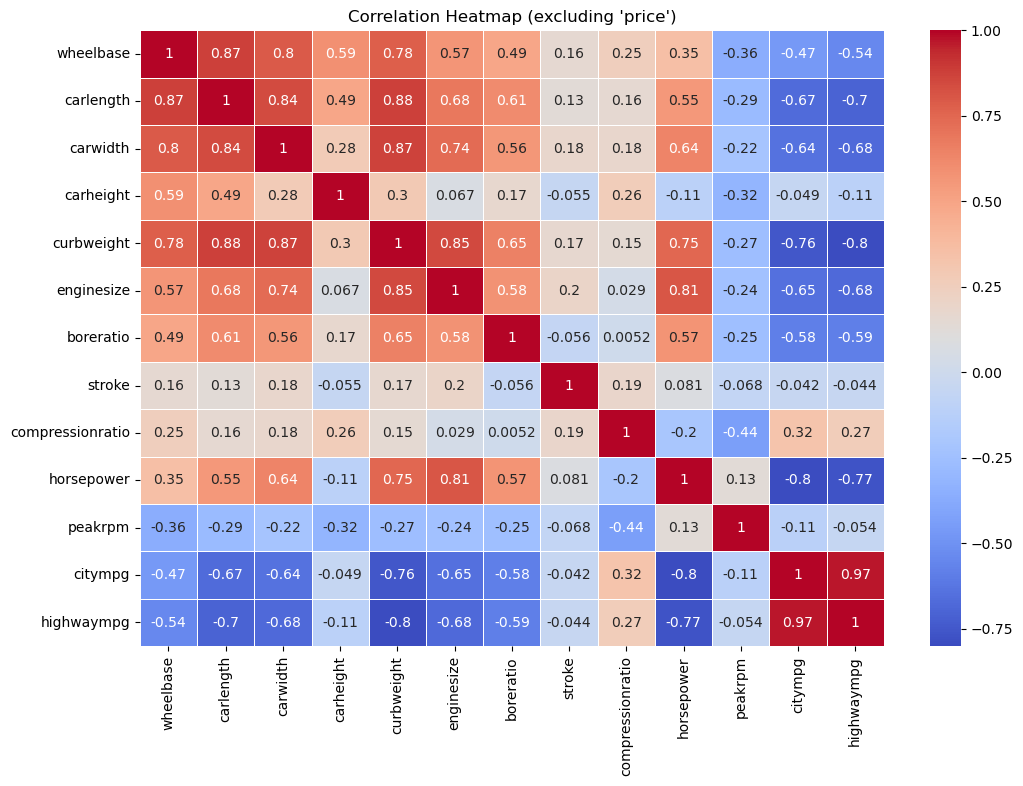

In [162]:
corr = numDf.drop(columns=['price']).corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (excluding 'price')")
plt.show()

In [165]:
corr = numDf.drop(columns=['price']).corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/152859729.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [166]:
to_drop_hicorr

['carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [167]:
numDf.drop(to_drop_hicorr, axis=1, inplace=True)

/var/folders/bp/1_gxbhpj33dfrg4whjn96chr0000gn/T/ipykernel_2665/3541318294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDf.drop(to_drop_hicorr, axis=1, inplace=True)


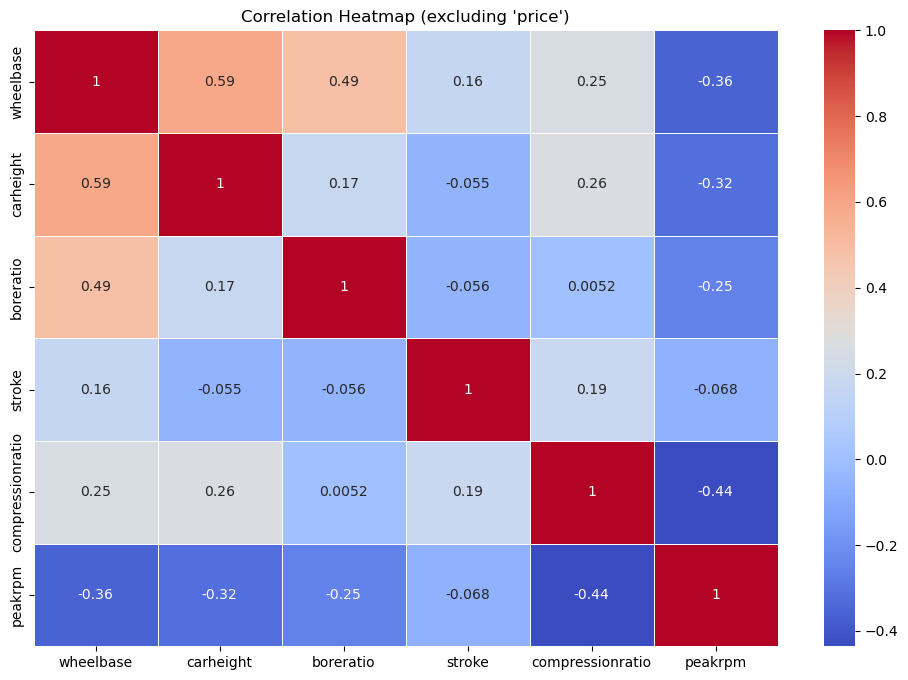

In [170]:
corr = numDf.drop(columns=['price']).corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (excluding 'price')")
plt.show()

## Combine Numerical and Categorical ##

In [168]:
preProDf = pd.concat([catDf, numDf], axis=1)

In [169]:
preProDf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,price
0,0,0,0,3,2,0,4,1,7,13,6,0.058309,0.083333,0.664286,0.290476,0.1250,0.346939,13495.0
1,0,0,0,3,2,0,4,1,7,13,6,0.058309,0.083333,0.664286,0.290476,0.1250,0.346939,16500.0
2,0,0,0,0,2,0,5,4,7,13,4,0.230321,0.383333,0.100000,0.666667,0.1250,0.346939,16500.0
3,0,0,1,1,0,0,0,1,7,16,5,0.384840,0.541667,0.464286,0.633333,0.1875,0.551020,13950.0
4,0,0,1,1,1,0,0,3,7,16,5,0.373178,0.541667,0.464286,0.633333,0.0625,0.551020,17450.0


## Feature Selection ##

In [179]:
from sklearn.feature_selection import mutual_info_regression

In [180]:
X = preProDf.drop(columns=['price'])
y = preProDf['price']

In [183]:
imp = mutual_info_regression(X, y)

In [187]:
imp

array([0.03682321, 0.09713891, 0.        , 0.06263121, 0.33140711,
       0.00358668, 0.18584089, 0.34534277, 0.47261816, 0.55926057,
       0.20830892, 0.58475875, 0.34572274, 0.45097309, 0.35690381,
       0.16897246, 0.18962024])

In [184]:
impDf = pd.DataFrame(imp, index=X.columns)

In [185]:
impDf.columns=['importance']

In [186]:
impDf.sort_values(by='importance', ascending=False)

,importance
wheelbase,0.584759
CarBrand,0.559261
fuelsystem,0.472618
boreratio,0.450973
stroke,0.356904
carheight,0.345723
cylindernumber,0.345343
drivewheel,0.331407
symboling,0.208309
peakrpm,0.189620


In [189]:
top_n = 16 

selected_features = impDf.sort_values(by='importance', ascending=False).head(top_n).index

X = preProDf[selected_features]

In [190]:
X.head()

,wheelbase,CarBrand,fuelsystem,boreratio,stroke,carheight,cylindernumber,drivewheel,symboling,peakrpm,enginetype,compressionratio,aspiration,carbody,fueltype,enginelocation
0,0.058309,13,7,0.664286,0.290476,0.083333,1,2,6,0.346939,4,0.1250,0,3,0,0
1,0.058309,13,7,0.664286,0.290476,0.083333,1,2,6,0.346939,4,0.1250,0,3,0,0
2,0.230321,13,7,0.100000,0.666667,0.383333,4,2,4,0.346939,5,0.1250,0,0,0,0
3,0.384840,16,7,0.464286,0.633333,0.541667,1,0,5,0.551020,0,0.1875,0,1,0,0
4,0.373178,16,7,0.464286,0.633333,0.541667,3,1,5,0.551020,0,0.0625,0,1,0,0


## Split Dataset ##

In [173]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 16)
X_test shape: (41, 16)
y_train shape: (164,)
y_test shape: (41,)


## Modelling ##

### Linear Regression ###

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [197]:
y_pred = regressor.predict(X_test)

In [201]:
X_test.head()

,wheelbase,CarBrand,fuelsystem,boreratio,stroke,carheight,cylindernumber,drivewheel,symboling,peakrpm,enginetype,compressionratio,aspiration,carbody,fueltype,enginelocation
15,0.492711,18,7,0.771429,0.628571,0.658333,4,2,3,0.510204,0,0.062500,0,1,0,0
9,0.376093,16,7,0.421429,0.633333,0.350000,3,1,3,0.551020,0,0.000000,1,0,0,0
100,0.309038,5,1,0.564286,0.666667,0.575000,1,0,3,0.428571,0,0.093750,0,1,0,0
132,0.364431,12,7,0.714286,0.476190,0.691667,1,0,6,0.448980,0,0.144375,0,0,0,0
68,0.682216,20,6,0.742857,0.747619,0.908333,3,2,1,0.081633,0,0.906250,1,2,1,0


In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
def evaluation(model):
    y_pred=model.predict(X_test)
    y_predTrain=model.predict(X_train)
    
    print("RMSE (test): "+str(mean_squared_error(y_test, y_pred, squared=False)))
    print("RMSE (train): "+str(mean_squared_error(y_train, y_predTrain, squared=False)))
    print("MAPE (test): "+str(mean_absolute_percentage_error(y_test, y_pred)))
    print("MAPE (train): "+str(mean_absolute_percentage_error(y_train, y_predTrain)))
    print("r2 (test): "+str(r2_score(y_test, y_pred)))
    print("r2 (train): "+str(r2_score(y_train, y_predTrain)))

In [210]:
evaluation(regressor)

RMSE (test): 3617.7884417624387
RMSE (train): 2564.8071927605706
MAPE (test): 0.21046518753501642
MAPE (train): 0.15522901525830024
r2 (test): 0.8342066560138627
r2 (train): 0.889696940325673


#### Our model seems to be best fit, but i will still try to use regularization and hyperparameter tuning to see whether i can boost our model performance ####

## Regularization: Ridge ##

In [225]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [226]:
evaluation(ridge)

RMSE (test): 3655.8291122796527
RMSE (train): 2624.669242134583
MAPE (test): 0.2023507626519365
MAPE (train): 0.16266125113160984
r2 (test): 0.8307017257384801
r2 (train): 0.8844879537462256


## Hyperparameter Tuning ##

In [228]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [229]:
alpha = [0.001, 0.01]
solver = ['auto']
hyperparameters = dict(alpha=alpha, solver=solver)

In [233]:
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=10, random_state=101)

In [235]:
rs.fit(X_train,y_train)

/Users/christoforusvenus/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [0.001, 0.01],
                                        'solver': ['auto']},
                   random_state=101, scoring='r2')

In [236]:
evaluation(rs)

RMSE (test): 3619.592509947401
RMSE (train): 2564.8709221199124
MAPE (test): 0.2101955828302837
MAPE (train): 0.15519434110548672
r2 (test): 0.8340412637704484
r2 (train): 0.8896914587201317


### It doesn't change much, but ridge show better result among the other. I will also try to do other algorithm ###

## Non-Linear Algorithm ##

### Decision Tree ###

In [244]:
from sklearn.tree import DecisionTreeRegressor

In [245]:
dt = DecisionTreeRegressor()

In [247]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [248]:
evaluation(dt)

RMSE (test): 4413.879034651252
RMSE (train): 625.8956931463796
MAPE (test): 0.16906739253408423
MAPE (train): 0.027227269714959434
r2 (test): 0.7532133793611456
r2 (train): 0.99343126049049


#### Bad result, seems to be overfitting because the error on data training decreasing while error in data testing increasing, we can see it from the r2 score ####

### Random Forest ###

In [250]:
from sklearn.ensemble import RandomForestRegressor

In [251]:
rf = RandomForestRegressor()

In [252]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [253]:
evaluation(rf)

RMSE (test): 2872.6010676407477
RMSE (train): 1098.3979854512759
MAPE (test): 0.11746291812862578
MAPE (train): 0.05774598648793058
r2 (test): 0.8954723004749167
r2 (train): 0.9797699214571698


#### Result's better than the Decision Tree but still the model is tend to be overfitting ####

### Support Vector Regressor ###

In [255]:
from sklearn.svm import SVR

In [256]:
svr = SVR()

In [257]:
svr.fit(X_train, y_train)

SVR()

In [259]:
evaluation(svr)

RMSE (test): 9308.977560424039
RMSE (train): 8120.939356968411
MAPE (test): 0.3596039731992934
MAPE (train): 0.3838270050625831
r2 (test): -0.09770267912472264
r2 (train): -0.10583580710178953


#### r2 give negative return, it means that the model is unable to explain the variation in the target data and provides very poor predictions ####

## Conclusion ##

#### Among all of that, ridge give the best return. so i will just use ridge as our model ####